# King County House Sales Data Exploration, Analysis, & Modeling
### Kevin Velasco & Alex Shropshire

#### Imports

In [2]:
#PANDAS, NUMPY, MATPLOTLIB, SEABORN, MATH
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from math import sqrt

#STATSMODELS
import statsmodels.api as sm
from statsmodels.formula.api import ols

#SCI-KIT LEARN
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error

#### Data Loading

In [3]:
house_df = pd.read_csv('kc_house_data.csv')
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


#### Initial Correlation Analysis

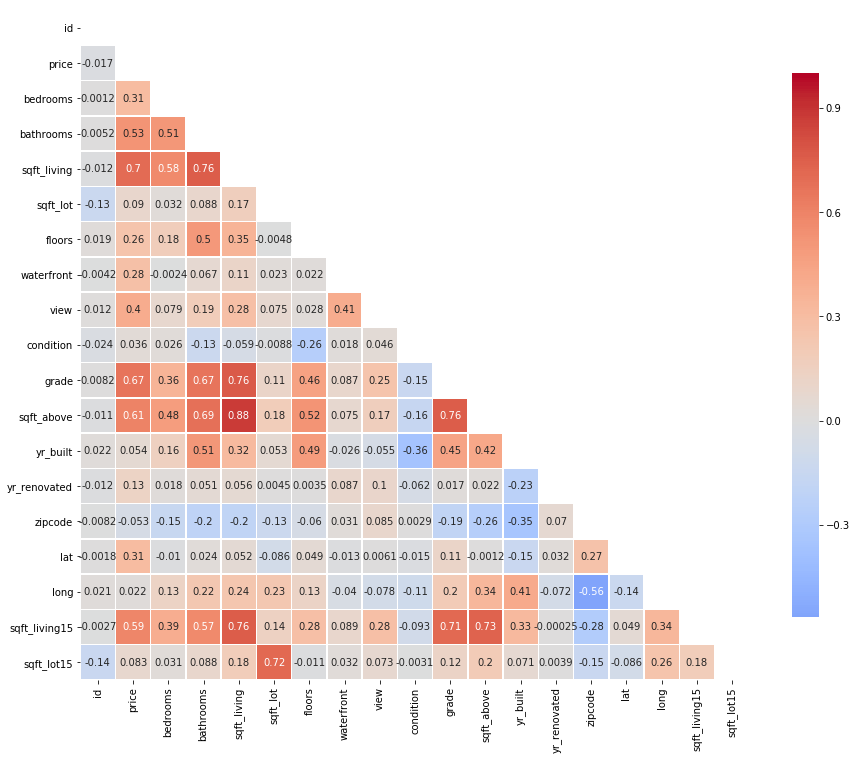

In [4]:
corr = house_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

- Correlation
- Notes
- Here


#### Data Cleaning Notes:
- set waterfront nulls to 0, assumption: nulls mean there is no waterfront view
- set view nulls to 0, assumption: nulls mean nobody has viewed
- set yr_renovated 0's to nulls, assumption: 0 = no renovation has been done
- set sqft_basement '0's & '?' to null, assumption: 0 & ? means no basement exists
- Change date to type datetime64 using pd.Timestamp
- Change zipcode to type str
- Change sqft_basement to type float

In [5]:
house_dff = house_df #to keep integrity of original dataframe, we'll manipulate a copy

In [6]:
#1) Set waterfront nulls to 0, assumption: nulls mean there is no waterfront view
house_dff['waterfront'] = house_dff['waterfront'].fillna(0)

#2) set view nulls to 0, assumption: nulls mean nobody has viewed
house_dff['view'] = house_dff['view'].fillna(0)

#3) set yr_renovated 0's to nulls, assumption: 0 = no renovation has been done
house_dff['yr_renovated'] = house_dff['yr_renovated'].replace(0,np.nan)

#4) set sqft_basement '0's & '?' to null, assumption: 0 & ? means no basement exists. values are in str format
house_dff['sqft_basement'] = house_dff['sqft_basement'].replace('0.0',np.nan)
house_dff['sqft_basement'] = house_dff['sqft_basement'].replace('?',np.nan)

#5) Change date to type datetime64 using pd.Timestamp
house_dff.date = house_dff.date.apply(pd.Timestamp)

#6) Change zipcode to type str
house_dff.zipcode = house_dff.zipcode.astype(str)

#7) Change sqft_basement to type float
house_dff['sqft_basement'] = house_dff['sqft_basement'].astype(float)

In [7]:
#View information of new dataframe house_dff after cleaning steps were completed
house_dff.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,NaN,1955,NaN,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,NaN,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,NaN,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,NaN,1987,NaN,98074,47.6168,-122.045,1800,7503


#### Initial Visualizations: 
1) Histograms of x-variables 

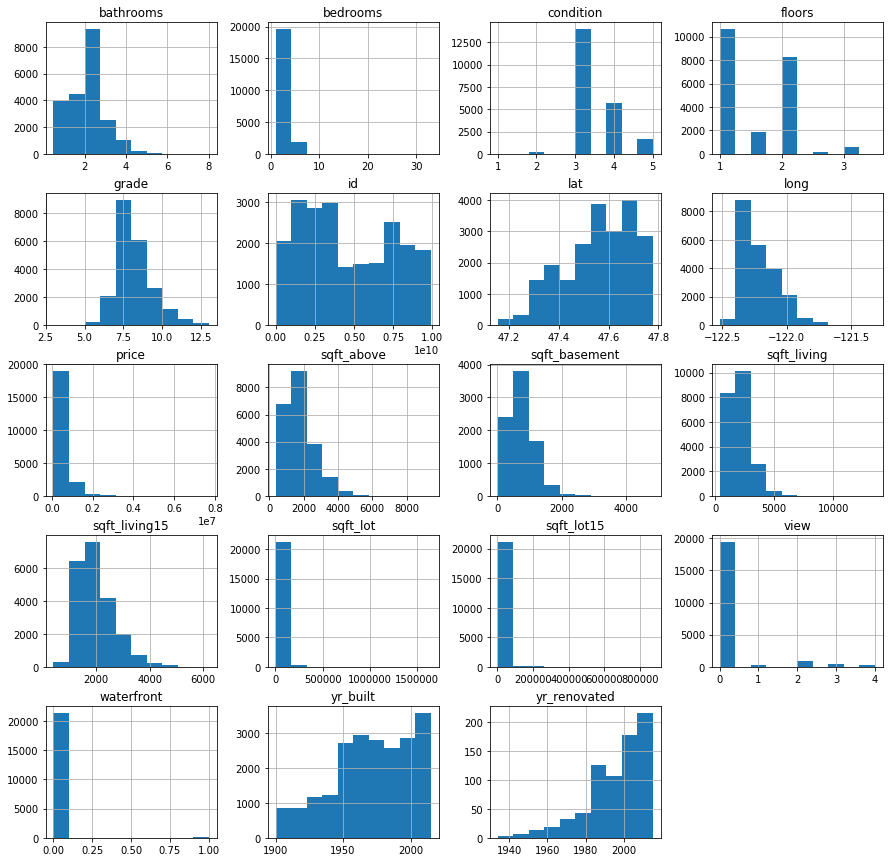

In [8]:
#Plot histograms of our x variables
house_dff.hist(figsize=[15,15]);

#### Initial Visualizations: 
2) Simple Linear Regression Top x-variables vs. Price (y) & R-Squared values

R-squared: 0.49268789904035104


/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


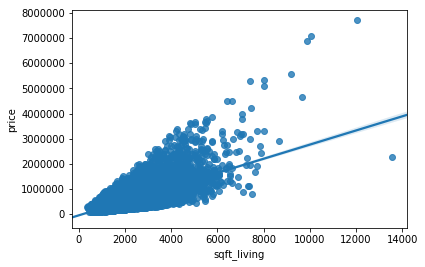

In [9]:
#POTENTIAL TOP 8 FEATURES (inferred from strength of correlation) PLOTTED
y = house_dff['price']
sqft_living_x = house_dff['sqft_living']
model = ols(formula = "y~sqft_living_x", data=house_dff).fit()
print(f"R-squared: {model.rsquared}")
#PLOT
sns.regplot(x='sqft_living', y='price', data=house_dff); #r=0.7

R-squared: 0.44615823299735025


/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


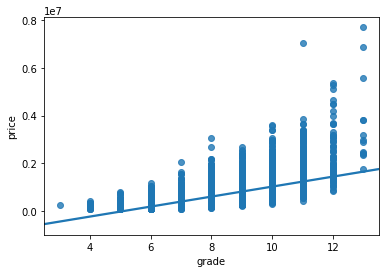

In [10]:
grade_x = house_dff['grade']
model = ols(formula = "y~grade_x", data=house_dff).fit()
print(f"R-squared: {model.rsquared}")
#PLOT
sns.regplot(x='grade', y='price', data=house_dff); #r=0.67

R-squared: 0.3664703472658384


/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


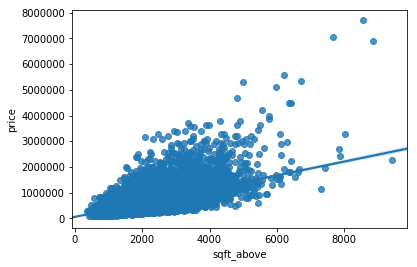

In [11]:
sqft_above_x = house_dff['sqft_above']
model = ols(formula = "y~sqft_above_x", data=house_dff).fit()
print(f"R-squared: {model.rsquared}")
#PLOT
sns.regplot(x='sqft_above', y='price', data=house_dff); #r=0.61

R-squared: 0.3425072641720194


/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


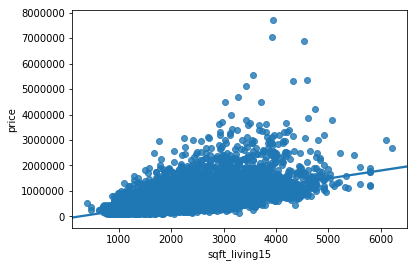

In [12]:
sqft_living15_x = house_dff['sqft_living15']
model = ols(formula = "y~sqft_living15_x", data=house_dff).fit()
print(f"R-squared: {model.rsquared}")
#PLOT
sns.regplot(x='sqft_living15', y='price', data=house_dff);#r=0.59

R-squared: 0.27657672267607736


/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


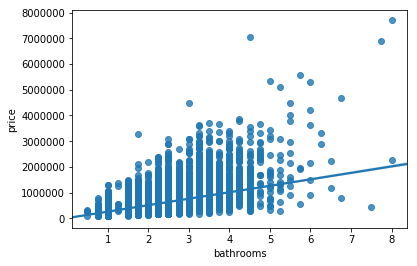

In [13]:
bathrooms_x = house_dff['bathrooms']
model = ols(formula = "y~bathrooms_x", data=house_dff).fit()
print(f"R-squared: {model.rsquared}")
#PLOT
sns.regplot(x='bathrooms', y='price', data=house_dff);#r=0.53

R-squared: 0.154839628812666


/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


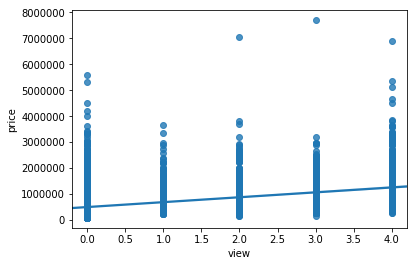

In [14]:
view_x = house_dff['view']
model = ols(formula = "y~view_x", data=house_dff).fit()
print(f"R-squared: {model.rsquared}")
#PLOT
sns.regplot(x='view', y='price', data=house_dff);#r=0.4

R-squared: 0.09534970283730637


/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


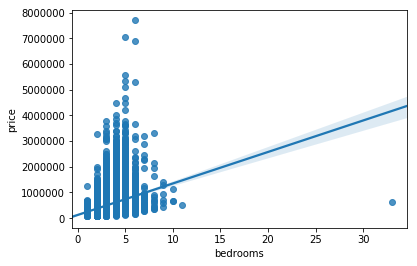

In [15]:
bedrooms_x = house_dff['bedrooms']
model = ols(formula = "y~bedrooms_x", data=house_dff).fit()
print(f"R-squared: {model.rsquared}")
#PLOT
sns.regplot(x='bedrooms', y='price', data=house_dff);#r=0.31

R-squared: 0.09406017561856983


/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


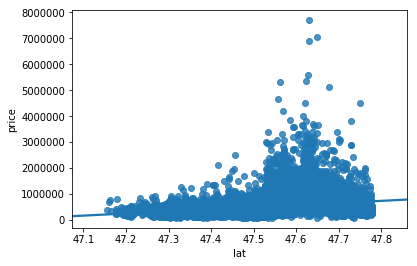

In [16]:
lat_x = house_dff['lat']
model = ols(formula = "y~lat_x", data=house_dff).fit()
print(f"R-squared: {model.rsquared}")
#PLOT
sns.regplot(x='lat', y='price', data=house_dff);#r=0.31

In [17]:
house_dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    8317 non-null float64
yr_built         21597 non-null int64
yr_renovated     744 non-null float64
zipcode          21597 non-null object
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(10), object(1)
memory u

#### Initial Feature Engineering & Quickly Testing Potential Relationship with Home Price (y)

- Combining # of beds + baths to a single digit
- Creating a binary (yes or no) of whether or not the house was renovated at all
- Combining through addition the square footage of living quarters and the entire lot
- Combining through addition the square footage of living quarters and the entire lot OF CLOSE NEIGHBORS

In [18]:
#Combining # of beds + baths to a single digit
house_dff['bed_bath_sum'] = house_dff['bedrooms'] + house_dff['bathrooms']

R-squared: 0.21843993553827934


/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


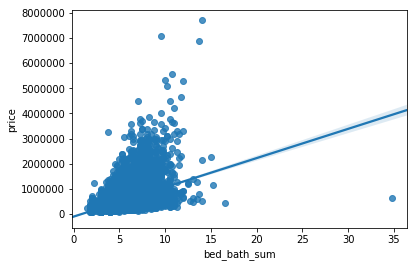

In [19]:
#Testing new feature: bed_bath_sum
bed_bath_sum_x = house_dff['bed_bath_sum']
model = ols(formula = "y~bed_bath_sum_x", data=house_dff).fit()
print(f"R-squared: {model.rsquared}")
#PLOT
sns.regplot(x='bed_bath_sum', y='price', data=house_dff);

In [20]:
#Creating a binary (yes or no) of whether or not the house was renovated at all
house_dff['renovation_yes'] = (~np.isnan(house_dff['yr_renovated'])).astype(int)

R-squared: 0.013816377301946403


/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


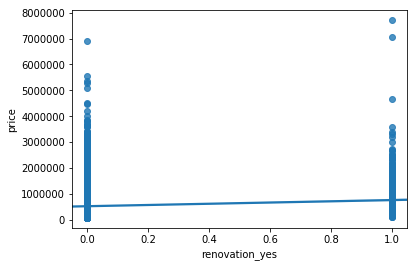

In [21]:
#Testing new feature: renovation_yes
renovation_yes_x = house_dff['renovation_yes']
model = ols(formula = "y~renovation_yes_x", data=house_dff).fit()
print(f"R-squared: {model.rsquared}")
#PLOT
sns.regplot(x='renovation_yes', y='price', data=house_dff);

In [22]:
#Combining through addition the square footage of living quarters and the entire lot
house_dff['sqft_living_plus_lot'] = house_dff['sqft_living'] + house_dff['sqft_lot']

R-squared: 0.011026846496555498


/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


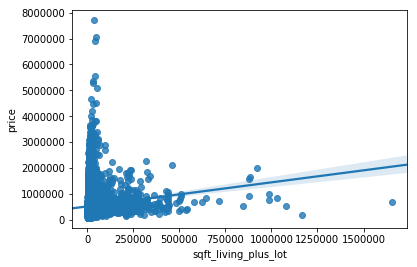

In [23]:
#Testing new feature: sqft_living_plus_lot
sqft_living_plus_lot_x = house_dff['sqft_living_plus_lot']
model = ols(formula = "y~sqft_living_plus_lot_x", data=house_dff).fit()
print(f"R-squared: {model.rsquared}")
#PLOT
sns.regplot(x='sqft_living_plus_lot', y='price', data=house_dff);

In [24]:
#Combining through addition the square footage of living quarters and the entire lot OF CLOSE NEIGHBORS
house_dff['sqft_living_plus_lot_15'] = house_dff['sqft_living15'] + house_dff['sqft_lot15']

R-squared: 0.009422826639618465


/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


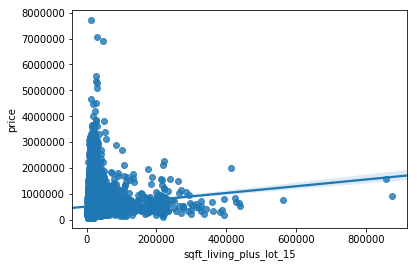

In [25]:
#Testing new feature: sqft_living_plus_lot15
sqft_living_plus_lot_15_x = house_dff['sqft_living_plus_lot_15']
model = ols(formula = "y~sqft_living_plus_lot_15_x", data=house_dff).fit()
print(f"R-squared: {model.rsquared}")
#PLOT
sns.regplot(x='sqft_living_plus_lot_15', y='price', data=house_dff);

##### Initial Feature Engineering Insights:

- Comments
- About new features
- Here

#### Creating MLR Output & Error Functions for Reproduceability (when y='price')

In [71]:
def statsmodels_lin_regress_summary(df):
    X = df.drop(['log_price','price'], axis=1)
    y = df.log_price
    predictors = np.asarray(X) #set predictors as numpy array of capital X
    predictors_int = sm.add_constant(predictors) #.add_constant
    model = sm.OLS(y,predictors_int).fit() #statsmodels.OrdinaryLeastSquares (dependent var, array of predictors).fit()
    print(f'Our list of predictors: {X.columns}')
    print(model.summary())

In [72]:
def sklearn_lin_regress_summary(df):
    X = df.drop(['log_price','price'], axis=1)
    y = df.log_price
    ss = StandardScaler()
    X_scaled = ss.fit_transform(X)
    np.random.seed(33)
    X_train,X_test,y_train,y_test = train_test_split(X_scaled,y)
    lr = LinearRegression()
    lr.fit(X_train,y_train) #fit model
    coeff_array = lr.coef_
    r_2 = metrics.r2_score(y_test, lr.predict(X_test))
    mae = metrics.mean_absolute_error(np.exp(y_test), np.exp(lr.predict(X_test)))
    mse = metrics.mean_squared_error(np.exp(y_test), np.exp(lr.predict(X_test)))
    
    print("Results of Sklearn's Train-Test-Split below:")
    #print(f"Array of coefficients: {coeff_array}")
    print(f'Our list of predictors: {X.columns}')
    print(f"R-squared:{r_2}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): ${sqrt(mse)}")

In [73]:
def kfolds(data, k):
    #Force data as pandas dataframe
    data = pd.DataFrame(data)
    num_observations = len(data)
    fold_size = num_observations//k
    leftovers = num_observations%k
    folds = []
    start_obs = 0
    for fold_n in range(1,k+1):
        if fold_n <= leftovers:
            #Fold Size will be 1 larger to account for leftovers
            fold =  data.iloc[start_obs : start_obs+fold_size+1] 
            folds.append(fold)
            start_obs +=  fold_size + 1
        else:
            fold =  data.iloc[start_obs : start_obs+fold_size] 
            folds.append(fold)
            start_obs +=  fold_size
            
    return folds 

def k_folds_error_summary(df,k):
    X = df.drop(['log_price','price'], axis=1)
    y = df[['log_price']]
    k_folds_df = kfolds(df, k)
    MSE_test_errs = []
    MSE_train_errs = []
    MAE_test_errs = []
    MAE_train_errs = []
    k=k
    lr = LinearRegression()
    cv_k_results = cross_val_score(lr, X, y, cv=k, scoring="r2")
    for n in range(k):
        # Split in train and test for the fold
        train = pd.concat([fold for i, fold in enumerate(k_folds_df) if i!=n])
        test = k_folds_df[n]
        # Fit a linear regression model
        lr.fit(train[X.columns], train[y.columns])
        #Evaluate Train and Test Errors
        y_hat_train = lr.predict(train[X.columns])
        y_hat_test = lr.predict(test[X.columns])
        train_residuals = np.exp(y_hat_train) - np.exp(train[y.columns])
        test_residuals = np.exp(y_hat_test) - np.exp(test[y.columns])
        MSE_train_errs.append(np.mean(train_residuals.astype(float)**2))
        MSE_test_errs.append(np.mean(test_residuals.astype(float)**2))
        MAE_train_errs.append(np.mean(abs(train_residuals.astype(float))))
        MAE_test_errs.append(np.mean(abs(test_residuals.astype(float))))
    print(f'Our list of predictors: {X.columns}')
    print(f'Our R-Squared when k={k} is:{np.mean(cv_k_results)}')
    print(f" Our average training MAE when k={k} is:{np.mean(MAE_train_errs)}")
    #print(f" Our average test MAE when k={k} is:{np.mean(MAE_test_errs)}")
    print(f" Our average training MSE when k={k} is:{np.mean(MSE_train_errs)}")
    #print(f" Our average test MSE when k={k} is:{np.mean(MSE_test_errs)}")
    print(f" Our average training RMSE when k={k} is:{sqrt(np.mean(MSE_train_errs))}")
    #print(f" Our average test RMSE when k={k} is:{sqrt(np.mean(MSE_test_errs))}")

#### Benchmark Model: 1st Multiple Linear Regression using Top 6 Features

- We decided to make our first MLR model using the features that have the strongest relationship with price, by examining both the feature's R-squared output from each 2-variable Simple Linear Regression ran vs. Home Price, alongside its Pearson's correlation coefficient.
- Top 6 Features: 'sqft_living','grade','sqft_above','sqft_living15','bathrooms','view'
- We will use the model quality outputs from statsmodels, scikitlearn, and k-folds cross validation to assess each model improvement hereafter, with the below outputs as benchmarks going forward.

In [74]:
house_top6_df = house_dff[['price','sqft_living','grade','sqft_above','sqft_living15','bathrooms','view']]

- We decided to log transform our target variable price instead of simply using 'price', which is not normally distributed, in our first MLR
- log_price is a more useful target variable than price because the distribution of log_price is closer to normal than price, and the assumptions of linear regressions state that variables must be (at least almost) normally distributed
- A log transformation like this is quite typical to apply when the variable is not normally distributed

/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


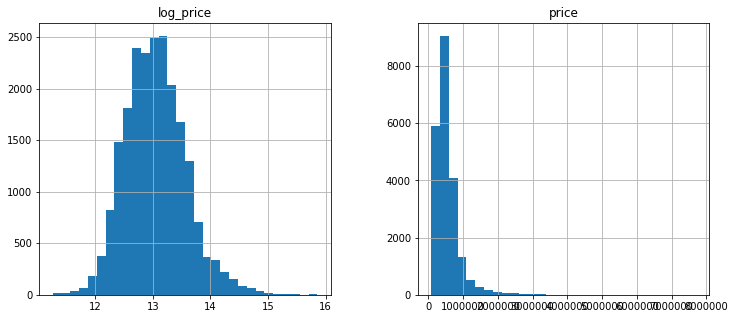

In [75]:
#LOG TRANSFORMATION OF PRICE
house_top6_df['log_price'] = np.log(house_top6_df['price'])
house_top6_df[['log_price', 'price']].hist(figsize=(12,5),bins=30);

In [76]:
#statsmodels output
statsmodels_lin_regress_summary(house_top6_df)

Our list of predictors: Index(['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',
       'view'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     5034.
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        13:51:03   Log-Likelihood:                -7343.4
No. Observations:               21597   AIC:                         1.470e+04
Df Residuals:                   21590   BIC:                         1.476e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0

In [77]:
#sci-kit learn output
sklearn_lin_regress_summary(house_top6_df)

Results of Sklearn's Train-Test-Split below:
Our list of predictors: Index(['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',
       'view'],
      dtype='object')
R-squared:0.5941566537740014
Mean Absolute Error (MAE): 145721.69281836363
Mean Squared Error (MSE): 49489790470.36296
Root Mean Squared Error (RMSE): $222463.0092180787


/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [78]:
#k-folds cross validation output
k_folds_error_summary(house_top6_df,5)

Our list of predictors: Index(['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',
       'view'],
      dtype='object')
Our R-Squared when k=5 is:0.5807327492042123
 Our average training MAE when k=5 is:146071.1318599893
 Our average training MSE when k=5 is:56550273327.67845
 Our average training RMSE when k=5 is:237803.01370604715


#### 1st MLR Benchmarks & Observations (Price vs. Top 6 Features)
###### Top 6: 'sqft_living','grade','sqft_above','sqft_living15','bathrooms','view'

###### R-squared Benchmarks:
- statsmodels R-squared: 0.58
- sci-kit learn R-squared: 0.59
- k=5 kfolds mean R-squared: 0.58

###### MAE Benchmarks:
- sci-kit learn MAE: 145,721
- k=5 kfolds mean MAE: 146,071

###### RMSE Benchmarks:
- sci-kit learn RMSE: 222,463
- k=5 kfolds mean RMSE: 237,803

###### Observations:
- SLR: Without taking into account multicollinearity, our our R-squared was small at **0.49**, MAE and MSE scores are massive! But its okay, this gives us a baseline of what to improve upon for our next model.
- MLR: By including our Top 6 variables instead of simply the sqft_living variable, we saw improvments in model quality in all 3 important metrics: R-squared, MAE, and MSE
- The improvement in R-Squared was small but decently significant, changing by 0.1, all before any modifications are made to our Multivariable model based on potential multicollinearity. We think that is the next best area to look into for an improved MLR model.

### MLR Model Improvement Tests

#### Test 1: dropping 'sqft_above'
###### sqft_above correlates highly (~0.8) with our strongest predictor sqft_living, and is a potential source of multicollinearity. We think dropping sqft_above will improve the model. Let's see what happens!

In [79]:
df1 = house_top6_df.drop(['sqft_above'], axis=1)
df1.head()

,price,sqft_living,grade,sqft_living15,bathrooms,view,log_price
0,221900.0,1180,7,1340,1.00,0.0,12.309982
1,538000.0,2570,7,1690,2.25,0.0,13.195614
2,180000.0,770,6,2720,1.00,0.0,12.100712
3,604000.0,1960,7,1360,3.00,0.0,13.311329
4,510000.0,1680,8,1800,2.00,0.0,13.142166


In [83]:
#statsmodels output
statsmodels_lin_regress_summary(df1)

Our list of predictors: Index(['sqft_living', 'grade', 'sqft_living15', 'bathrooms', 'view'], dtype='object')
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     5895.
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        14:09:26   Log-Likelihood:                -7496.6
No. Observations:               21597   AIC:                         1.501e+04
Df Residuals:                   21591   BIC:                         1.505e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [84]:
#sci-kit learn output
sklearn_lin_regress_summary(df1)

Results of Sklearn's Train-Test-Split below:
Our list of predictors: Index(['sqft_living', 'grade', 'sqft_living15', 'bathrooms', 'view'], dtype='object')
R-squared:0.5868925696731291
Mean Absolute Error (MAE): 147108.20373288172
Mean Squared Error (MSE): 49398906678.23135
Root Mean Squared Error (RMSE): $222258.64815172288


/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [85]:
#k-folds cross validation output
k_folds_error_summary(df1,5)

Our list of predictors: Index(['sqft_living', 'grade', 'sqft_living15', 'bathrooms', 'view'], dtype='object')
Our R-Squared when k=5 is:0.5747232810060648
 Our average training MAE when k=5 is:147381.34323857725
 Our average training MSE when k=5 is:56366428450.226524
 Our average training RMSE when k=5 is:237416.150356766


#### Test 1 Observations: dropping 'sqft_above'


###### Benchmark Errors (before):
- statsmodels R-squared: 0.58
- sci-kit learn R-squared: 0.59
- k=5 kfolds mean R-squared: 0.58
- sci-kit learn MAE: 145,721
- k=5 kfolds mean MAE: 146,071
- sci-kit learn RMSE: 222,463
- k=5 kfolds mean RMSE: 237,803

###### New Errors (after):
- statsmodels R-squared: 0.577
- sci-kit learn R-squared: 0.586
- k=5 kfolds mean R-squared: 0.575
- sci-kit learn MAE: 147,108
- k=5 kfolds mean MAE: 147,381
- sci-kit learn RMSE: 222,258
- k=5 kfolds mean RMSE: 237,416

###### Observations:
- Test 1 did not improve our model in R-squared or MAE, though RMSE improved very slightly. We will not be dropping sqft_above.

In [ ]:
df2 = pd.read_csv('house_data_cleaned.csv') #dataset includes distance_from_flatiron

In [25]:
#ADD A PREDICT PRICE FUNCTION
def predict_price():
    